In [132]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
import  os
from keras.models import Sequential, load_model

from numpy import array

#使用到的库，如缺少可使用pip安装

# 数据格式1

### 预处理

In [83]:
import pandas as pd
import numpy as np
test_df = pd.read_csv('groups.csv')

In [84]:
test_df

,all_data
0,# update: 2020-01-24 09:47:38 CST
1,# place|confirmed_cases|deaths|notes|sources
2,Chongqing|9|0||
3,Hebei|1|1||
4,Guangxi|13|0||
5,Shanxi|1|0||
6,Sichuan|15|0||
7,Yunnan|2|0||
8,Beijing|26|0||
9,Zhejiang|43|0||


In [86]:
all_data = pd.DataFrame({'date_time':[],
                         'place':[],
                      'confirm':[],
                      'deaths':[]
                        
                        })

In [87]:
for i in range(len(test_df)):
    print(test_df.loc[i].values[0].split('|'))

['# update: 2020-01-24 09:47:38 CST']
['# place', 'confirmed_cases', 'deaths', 'notes', 'sources']
['Chongqing', '9', '0', '', '']
['Hebei', '1', '1', '', '']
['Guangxi', '13', '0', '', '']
['Shanxi', '1', '0', '', '']
['Sichuan', '15', '0', '', '']
['Yunnan', '2', '0', '', '']
['Beijing', '26', '0', '', '']
['Zhejiang', '43', '0', '', '']
['Hubei', '549', '0', '', '']
['Guangdong', '53', '0', '', '']
['Gansu', '2', '0', '', '']
['Jiangxi', '7', '0', '', '']
['Hunan', '9', '0', '', '']
['Jiangsu', '5', '0', '', '']
['Hainan', '5', '0', '', '']
['Anhui', '15', '0', '', '']
['Jilin', '1', '0', '', '']
['Henan', '9', '0', '', '']
['Liaoning', '3', '0', '', '']
['Shandong', '9', '0', '', '']
['Fujian', '5', '0', '', '']
['Shaanxi', '3', '0', '', '']
['Guizhou', '3', '0', '', '']
['Ningxia', '1', '0', '', '']
['Heilongjiang', '4', '0', '', '']
['# update: 2020-01-24 09:57:44 CST']
['# place', 'confirmed_cases', 'deaths', 'notes', 'sources']
['Hebei', '2', '1', '', '']
['Hubei', '549', '0', 

['Guangxi', '23', '0', '', '']
['Hainan', '19', '0', '', '']
['Jiangxi', '18', '0', '', '']
['Fujian', '18', '0', '???????????????? 20 ??', '']
['Jiangsu', '18', '0', '', '']
['Liaoning', '17', '0', '', '']
['Shaanxi', '15', '0', '', '']
['Yunnan', '11', '0', '', '']
['Tianjin', '10', '0', '', '']
['Heilongjiang', '9', '1', '', '']
['Hebei', '8', '1', '', '']
['Inner Mongolia', '7', '0', '', '']
['Shanxi', '6', '0', '', '']
['Hong Kong', '5', '0', '', '']
['Guizhou', '4', '0', '', '']
['Jilin', '4', '0', '', '']
['Gansu', '4', '0', '', '']
['Ningxia', '3', '0', '', '']
['Taiwan', '3', '0', '', '']
['Xinjiang', '3', '0', '', '']
['Macau', '2', '0', '', '']
['Qinghai', '1', '0', '', '']
['CHINA TOTAL', '0761786257434139333228272319181818171511109876544433321', '04000000000000000000001100000000000', '', '']
['# update: 2020-01-26 08:18:00 CST']
['# place', 'confirmed_cases', 'deaths', 'notes', 'sources']
['Hubei', '1053', '52', '', '']
['Henan', '83', '1', '', '']
['Guangdong', '78', '0',

['Hainan', '33', '1', '', '']
['Heilongjiang', '30', '1', '', '']
['Liaoning', '27', '0', '', '']
['Yunnan', '26', '0', '', '']
['Tianjin', '23', '0', '', '']
['Hebei', '18', '1', '', '']
['Gansu', '14', '0', '', '']
['Shanxi', '13', '0', '', '']
['Inner Mongolia', '11', '0', '', '']
['Guizhou', '9', '0', '', '']
['Hong Kong', '8', '0', '', '']
['Ningxia', '7', '0', '', '']
['Jilin', '6', '0', '', '']
['Macau', '6', '0', '', '']
['Qinghai', '6', '0', '', '']
['Taiwan', '5', '0', '', '']
['Xinjiang', '5', '0', '', '']
['CHINA TOTAL', '4313', '107', '', '']
['# update: 2020-01-28 09:17:00 CST']
['# place', 'confirmed_cases', 'deaths', 'notes', 'sources']
['Hubei', '2714', '100', '', '']
['Guangdong', '188', '0', '', '']
['Zhejiang', '173', '0', '', '']
['Henan', '168', '1', '', '']
['Chongqing', '132', '0', '', '']
['Anhui', '106', '0', '', '']
['Hunan', '100', '0', '', '']
['Sichuan', '90', '0', '', '']
['Shandong', '87', '1', '', '']
['Beijing', '80', '1', '', '']
['Jiangxi', '72', '0'

['Macau', '7', '0', '', '']
['Qinghai', '6', '0', '', '']
['Tibet', '0', '0', '???? 1 ??', '']
['CHINA TOTAL', '5983', '132', '', '']
['# update: 2020-01-29 11:17:24 CST']
['# place', 'confirmed_cases', 'deaths', 'notes', 'sources']
['Hubei', '3554', '125', '???????????????? 30', '']
['Zhejiang', '296', '0', '', '']
['Guangdong', '241', '0', '', '']
['Hunan', '221', '0', '', '']
['Henan', '206', '2', '???????????????? 1 ???? 1', '']
['Anhui', '152', '0', '', '']
['Chongqing', '147', '0', '', '']
['Shandong', '121', '0', '', '']
['Jiangxi', '109', '0', '', '']
['Sichuan', '108', '0', '', '']
['Jiangsu', '99', '0', '', '']
['Beijing', '91', '1', '???????????????? 1', '']
['Fujian', '82', '0', '', '']
['Shanghai', '80', '1', '???????????????? 7 ???? 1 ???? 1', '']
['Guangxi', '58', '0', '', '']
['Shaanxi', '56', '0', '', '']
['Hebei', '48', '1', '', '']
['Yunnan', '44', '0', '', '']
['Hainan', '43', '1', '', '']
['Heilongjiang', '37', '1', '', '']
['Liaoning', '36', '0', '', '']
['Shanxi'

['Qinghai', '6', '0', '', '']
['Tibet', '1', '0', '', '']
['CHINA TOTAL', '7584', '170', '', '']
['# update: 2020-01-30 09:20:28 CST']
['# place', 'confirmed_cases', 'deaths', 'notes', 'sources']
['Hubei', '4586', '162', '???????????????? 30', '']
['Zhejiang', '428', '0', '', '']
['Henan', '278', '2', '???????????????? 2 ???? 2', '']
['Guangdong', '277', '0', '', '']
['Hunan', '221', '0', '', '']
['Anhui', '200', '0', '', '']
['Chongqing', '165', '0', '', '']
['Jiangxi', '162', '0', '', '']
['Shandong', '145', '0', '', '']
['Sichuan', '142', '1', '', '']
['Jiangsu', '129', '0', '', '']
['Beijing', '111', '1', '???????????????? 1', '']
['Shanghai', '101', '1', '????????????????????????????????????????????????', '']
['Fujian', '84', '0', '', '']
['Guangxi', '78', '0', '', '']
['Hebei', '65', '1', '', '']
['Shaanxi', '56', '0', '', '']
['Yunnan', '55', '0', '', '']
['Hainan', '43', '1', '', '']
['Heilongjiang', '43', '1', '', '']
['Liaoning', '39', '0', '', '']
['Shanxi', '35', '0', '', '

['Macau', '7', '0', '', '']
['Tibet', '1', '0', '', '']
['CHINA TOTAL', '9600', '213', '', '']
['# update: 2020-01-31 09:57:16 CST']
['# place', 'confirmed_cases', 'deaths', 'notes', 'sources']
['Hubei', '5806', '204', '???????????????? 30', '']
['Zhejiang', '537', '0', '', '']
['Guangdong', '393', '0', '?????????????? 2 ??', '']
['Henan', '352', '2', '???????????????? 3', '']
['Hunan', '332', '0', '', '']
['Jiangxi', '240', '0', '', '']
['Anhui', '237', '0', '', '']
['Chongqing', '206', '0', '', '']
['Shandong', '178', '0', '', '']
['Sichuan', '177', '1', '', '']
['Jiangsu', '168', '0', '', '']
['Shanghai', '128', '1', '????????????????????????????????????????????????', '']
['Beijing', '121', '1', '???????????????? 1?????? 1', '']
['Fujian', '101', '0', '', '']
['Guangxi', '87', '0', '', '']
['Hebei', '82', '1', '', '']
['Yunnan', '76', '0', '', '']
['Shaanxi', '63', '0', '', '']
['Heilongjiang', '59', '2', '', '']
['Hainan', '50', '1', '', '']
['Liaoning', '45', '0', '', '']
['Shanxi

['Tibet', '1', '0', '', '']
['CHINA TOTAL', '11499', '258', '', '']
['# update: 2020-02-01 09:23:48 CST']
['# place', 'confirmed_cases', 'deaths', 'notes', 'sources']
['Hubei', '7153', '249', '???????????????? 47', '']
['Zhejiang', '599', '0', '', '']
['Guangdong', '520', '0', '', '']
['Henan', '422', '2', '???????????????? 1', '']
['Hunan', '332', '0', '', '']
['Anhui', '297', '0', '', '']
['Jiangxi', '286', '0', '', '']
['Chongqing', '238', '0', '', '']
['Sichuan', '207', '1', '', '']
['Jiangsu', '202', '0', '', '']
['Shandong', '184', '0', '', '']
['Shanghai', '153', '1', '????????????????????????????????????????????????', '']
['Beijing', '139', '1', '???????????????? 1?????? 1', '']
['Fujian', '120', '0', '', '']
['Guangxi', '100', '0', '', '']
['Hebei', '96', '1', '', '']
['Shaanxi', '87', '0', '', '']
['Yunnan', '83', '0', '', '']
['Heilongjiang', '80', '2', '', '']
['Liaoning', '60', '0', '', '']
['Hainan', '53', '1', '', '']
['Shanxi', '47', '0', '', '']
['Gansu', '35', '0', ''

['Tibet', '1', '0', '', '']
['CHINA TOTAL', '11890', '259', '', '']
['# update: 2020-02-01 23:14:06 CST']
['# place', 'confirmed_cases', 'deaths', 'notes', 'sources']
['Hubei', '7153', '249', '???????????????? 35', '']
['Zhejiang', '599', '0', '', '']
['Guangdong', '535', '0', '', '']
['Henan', '422', '2', '???????????????? 1', '']
['Hunan', '389', '0', '', '']
['Anhui', '297', '0', '', '']
['Jiangxi', '286', '0', '??????????????2??', '']
['Chongqing', '247', '1', '', '']
['Sichuan', '207', '1', '', '']
['Shandong', '206', '0', '', '']
['Jiangsu', '202', '0', '', '']
['Shanghai', '169', '1', '????????????????????????????????????????????????', '']
['Beijing', '168', '1', '???????????????? 1?????? 5', '']
['Fujian', '144', '0', '', '']
['Shaanxi', '101', '0', '', '']
['Guangxi', '100', '0', '', '']
['Hebei', '96', '1', '', '']
['Yunnan', '91', '0', '', '']
['Heilongjiang', '80', '2', '', '']
['Liaoning', '64', '0', '', '']
['Hainan', '62', '1', '???????????????? 2', '']
['Shanxi', '47', 

['CHINA TOTAL', '14446', '304', '', '']
['# update: 2020-02-02 16:32:15 CST']
['# place', 'confirmed_cases', 'deaths', 'notes', 'sources']
['Hubei', '9074', '294', '???????????????? 35', '']
['Zhejiang', '661', '0', '', '']
['Guangdong', '604', '0', '', '']
['Henan', '493', '2', '???????????????? 2', '']
['Hunan', '463', '0', '', '']
['Anhui', '340', '0', '', '']
['Jiangxi', '333', '0', '', '']
['Chongqing', '275', '1', '', '']
['Jiangsu', '236', '0', '', '']
['Sichuan', '231', '1', '', '']
['Shandong', '230', '0', '???????????????? 1?????? 5', '']
['Beijing', '191', '1', '???????????????? 1?????? 5', '']
['Shanghai', '182', '1', '????????????????????????????????????????????????', '']
['Fujian', '159', '0', '', '']
['Shaanxi', '116', '0', '', '']
['Guangxi', '111', '0', '', '']
['Hebei', '104', '1', '', '']
['Yunnan', '99', '0', '', '']
['Heilongjiang', '95', '2', '', '']
['Liaoning', '69', '0', '', '']
['Hainan', '63', '1', '', '']
['Shanxi', '56', '0', '', '']
['Tianjin', '48', '0', 

In [88]:
all_data

,confirm,date_time,deaths,place


In [89]:
import datetime
# str转时间格式：

for i in range(len(test_df)-1):
    
    if test_df.loc[i].values[0][:8]=='# update':
        time =datetime.datetime.strptime(test_df.loc[i].values[0][10:-13], "%Y-%m-%d") 
        continue
    if test_df.loc[i].values[0][0]=='#':
        continue
    all_data = all_data.append([{'date_time':time,'place':test_df.loc[i].values[0].split('|')[0],'confirm':test_df.loc[i].values[0].split('|')[1],
                      'deaths':test_df.loc[i].values[0].split('|')[2]}], ignore_index=True)

In [90]:
all_data['confirm'] = all_data['confirm'].apply(float)


In [91]:
all_data['deaths'] = all_data['deaths'].apply(float)


In [92]:
all_data

,confirm,date_time,deaths,place
0,9.0,2020-01-24,0.0,Chongqing
1,1.0,2020-01-24,1.0,Hebei
2,13.0,2020-01-24,0.0,Guangxi
3,1.0,2020-01-24,0.0,Shanxi
4,15.0,2020-01-24,0.0,Sichuan
5,2.0,2020-01-24,0.0,Yunnan
6,26.0,2020-01-24,0.0,Beijing
7,43.0,2020-01-24,0.0,Zhejiang
8,549.0,2020-01-24,0.0,Hubei
9,53.0,2020-01-24,0.0,Guangdong


In [93]:
province_data = all_data.groupby([all_data['place'],all_data['date_time']]).mean()
#del province_data['day']

#按照省份和时间进行分组


In [94]:
province_data  

confirm        deaths
place       date_time                             
Anhui       2020-01-24  1.500000e+01  0.000000e+00
            2020-01-25  2.607692e+01  0.000000e+00
            2020-01-26  5.300000e+01  0.000000e+00
            2020-01-27  6.750000e+01  0.000000e+00
            2020-01-28  1.006000e+02  0.000000e+00
            2020-01-29  1.506296e+02  0.000000e+00
            2020-01-30  1.857778e+02  0.000000e+00
            2020-01-31  2.264286e+02  0.000000e+00
            2020-02-01  2.831538e+02  0.000000e+00
            2020-02-02  3.302903e+02  0.000000e+00
            2020-02-03  3.400000e+02  0.000000e+00
Beijing     2020-01-24  2.785000e+01  0.000000e+00
            2020-01-25  3.715385e+01  0.000000e+00
            2020-01-26  4.983333e+01  0.000000e+00
            2020-01-27  7.133333e+01  8.333333e-02
            2020-01-28  8.330000e+01  1.000000e+00
            2020-01-29  9.703704e+01  1.000000e+00
            2020-01-30  1.124444e+02  1.000000e+00
            2020-01-31  1.263214e+02  1.000000e+00
            2020-02-01  1.497436e+02  1.000000e+00
            2020-02-02  1.794839e+02  1.000000e+00
            2020-02-03  1.910000e+02  1.000000e+00
CHINA TOTAL 2020-01-25  1.360600e+03  4.100000e+01
            2020-01-26  7.017059e+56  5.001733e+33
            2020-01-27  8.817593e+56  4.333417e+32
            2020-01-28  4.302650e+03  1.024000e+02
            2020-01-29  5.966148e+03  1.310370e+02
            2020-01-30  7.502444e+03  1.659259e+02
            2020-01-31  9.429179e+03  2.085000e+02
            2020-02-01  1.166056e+04  2.577179e+02
...                              ...           ...
Xinjiang    2020-01-27  4.666667e+00  0.000000e+00
            2020-01-28  8.750000e+00  0.000000e+00
            2020-01-29  1.288889e+01  0.000000e+00
            2020-01-30  1.366667e+01  0.000000e+00
            2020-01-31  1.603571e+01  0.000000e+00
            2020-02-01  1.758974e+01  0.000000e+00
            2020-02-02  2.070968e+01  0.000000e+00
            2020-02-03  2.100000e+01  0.000000e+00
Yunnan      2020-01-24  2.150000e+00  0.000000e+00
            2020-01-25  6.384615e+00  0.000000e+00
            2020-01-26  1.100000e+01  0.000000e+00
            2020-01-27  2.150000e+01  0.000000e+00
            2020-01-28  3.410000e+01  0.000000e+00
            2020-01-29  4.862963e+01  0.000000e+00
            2020-01-30  6.333333e+01  0.000000e+00
            2020-01-31  7.796429e+01  0.000000e+00
            2020-02-01  8.674359e+01  0.000000e+00
            2020-02-02  9.667742e+01  0.000000e+00
            2020-02-03  1.050000e+02  0.000000e+00
Zhejiang    2020-01-24  4.300000e+01  0.000000e+00
            2020-01-25  5.176923e+01  0.000000e+00
            2020-01-26  9.000000e+01  0.000000e+00
            2020-01-27  1.200000e+02  0.000000e+00
            2020-01-28  1.640000e+02  0.000000e+00
            2020-01-29  2.914444e+02  0.000000e+00
            2020-01-30  3.840000e+02  0.000000e+00
            2020-01-31  5.020714e+02  0.000000e+00
            2020-02-01  5.862821e+02  0.000000e+00
            2020-02-02  6.450000e+02  3.225806e-02
            2020-02-03  6.610000e+02  0.000000e+00

[372 rows x 2 columns]

### 仔细观察上述数据，可以发现全国的确诊数据(CHINA TOTAL)中 1月26/27号的数字出现异常，查看从丁香园爬取的原始数据发现此处原始数据存在问题，于是直接通过合并各省份数据来得出全国确诊数据

In [96]:
province = []
for name in province_data.index.values:
    province.append(name[0])
province = np.unique(province)

In [102]:
total = province_data.loc['CHINA TOTAL'] #CHINA TOTAL数据有点问题，简单粗暴的解决一下

In [103]:
total.loc[:,:] = 0

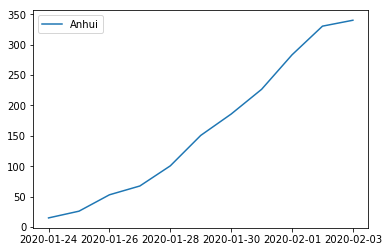

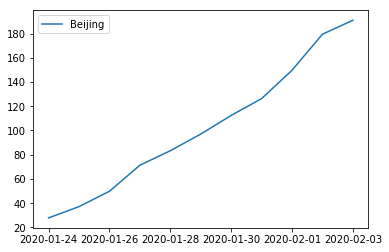

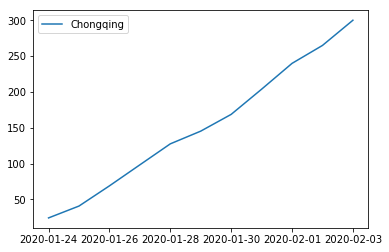

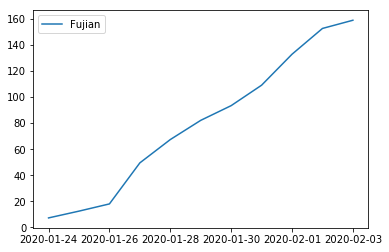

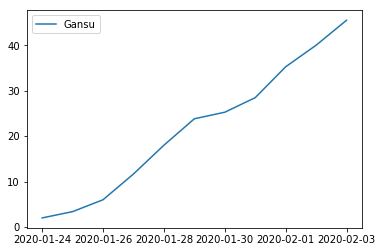

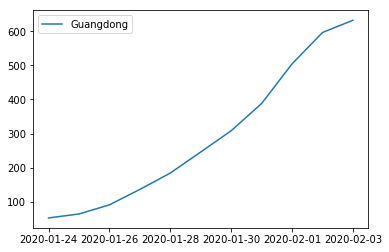

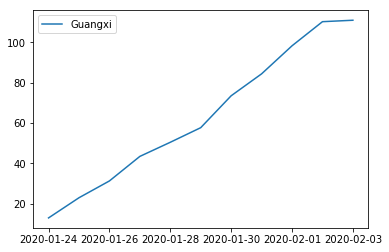

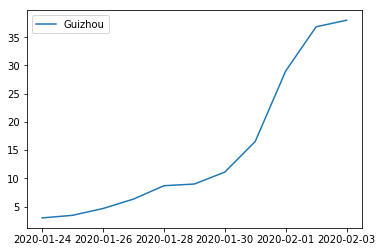

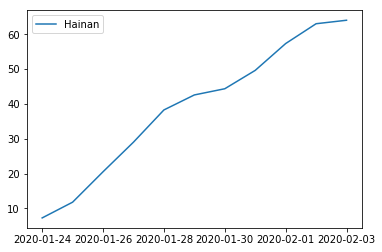

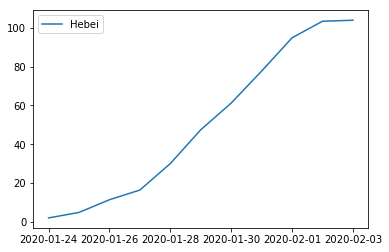

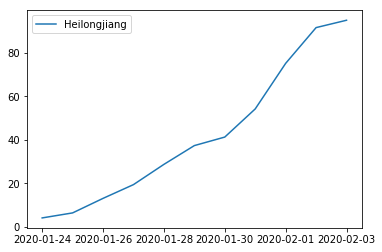

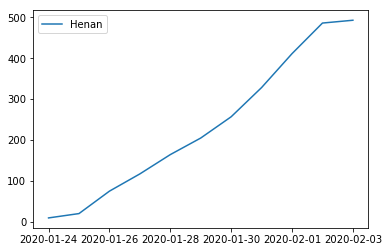

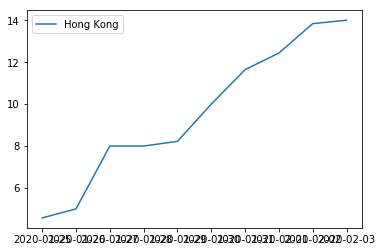

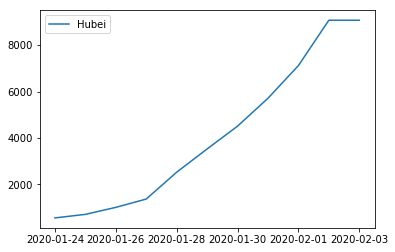

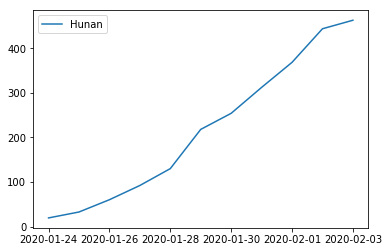

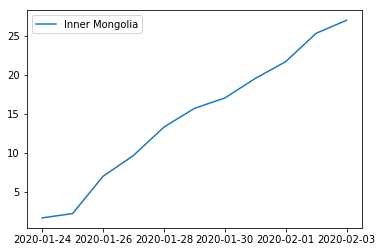

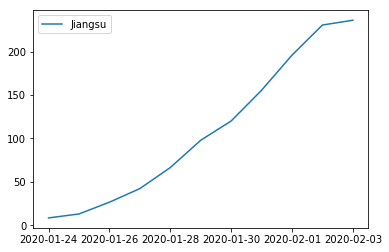

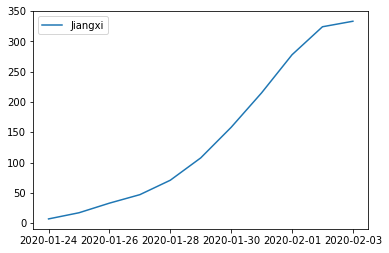

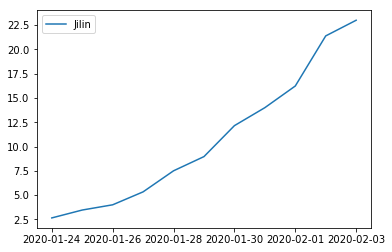

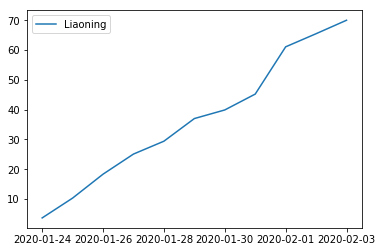

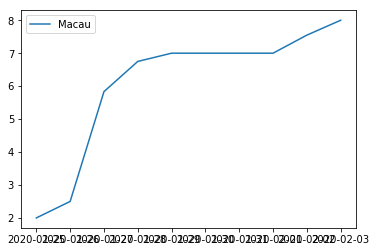

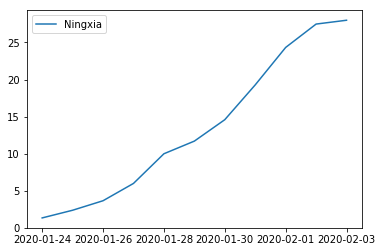

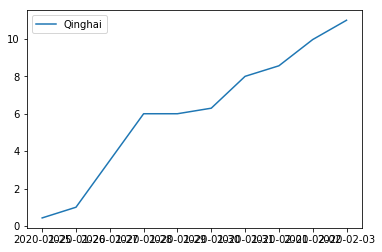

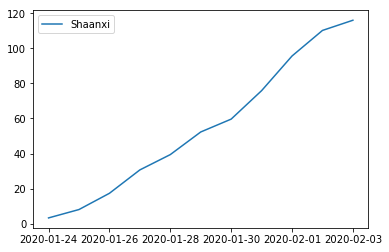

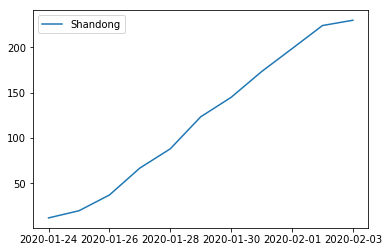

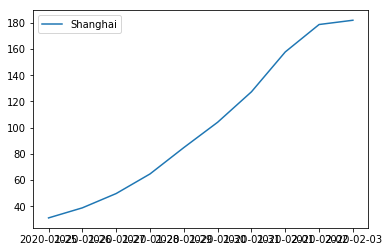

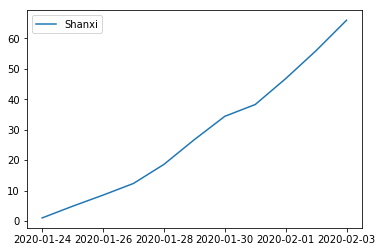

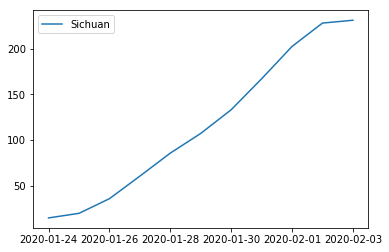

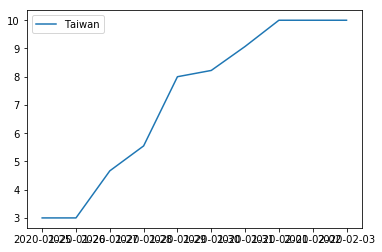

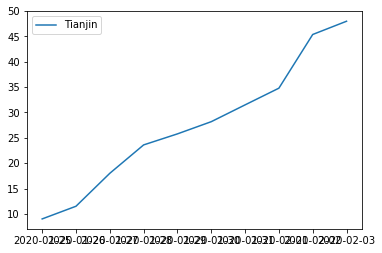

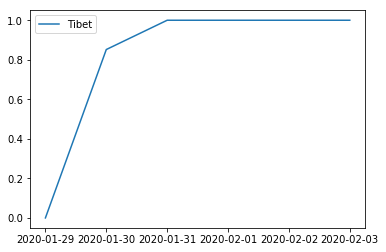

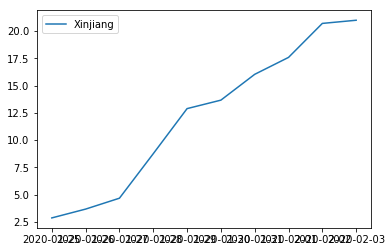

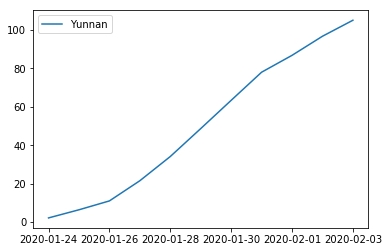

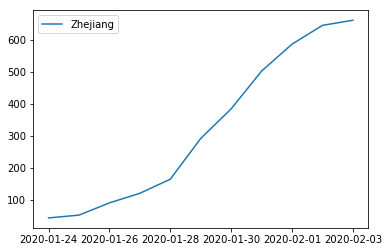

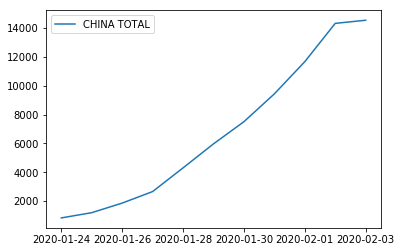

In [116]:
for i,name in enumerate(province):
    if name!='CHINA TOTAL':
        plt.figure(i)
        plt.plot(province_data.loc[name]['confirm'])
        plt.legend([name])
        total = total.add(province_data.loc[name],  fill_value=0)
plt.figure(i+1)
plt.plot(total['confirm'])
plt.legend(["CHINA TOTAL"])

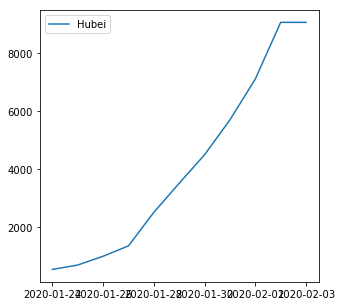

In [184]:
plt.figure(figsize=(5,5))
plt.plot(province_data.loc['Hubei']['confirm'])
plt.legend(['Hubei'])

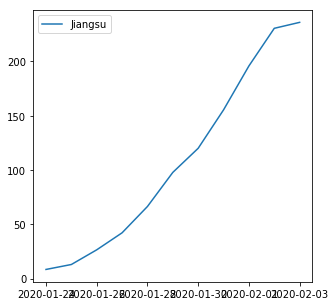

In [182]:
plt.figure(figsize=(5,5))
plt.plot(province_data.loc['Jiangsu']['confirm'])
plt.legend(['Jiangsu'])

# 数据格式2

In [4]:
confirm_case = pd.read_csv('confirmed_cases.csv')

In [5]:
confirm_case.head()

,Date,2020/1/24 9:47,2020/1/24 9:57,2020/1/24 10:03,2020/1/24 10:04,2020/1/24 10:30,2020/1/24 10:34,2020/1/24 11:05,2020/1/24 11:40,2020/1/24 11:42,...,2020/2/2 16:21,2020/2/2 16:32,2020/2/2 16:49,2020/2/2 17:34,2020/2/2 17:51,2020/2/2 18:24,2020/2/2 18:50,2020/2/2 23:01,2020/2/3 7:30,2020/2/3 7:33
0,Hubei,549,549,549,549,549,549,549,549,549,...,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074
1,Zhejiang,43,43,43,43,43,43,43,43,43,...,661,661,661,661,661,661,661,661,661,661
2,Guangdong,53,53,53,53,53,53,53,53,53,...,604,604,632,632,632,632,632,632,632,632
3,Henan,9,9,9,9,9,9,9,9,9,...,493,493,493,493,493,493,493,493,493,493
4,Hunan,9,9,9,9,9,9,24,24,24,...,463,463,463,463,463,463,463,463,463,463


In [6]:
china = pd.Series(confirm_case.loc[34].values[1:],index=pd.DatetimeIndex(confirm_case.columns[1:]))

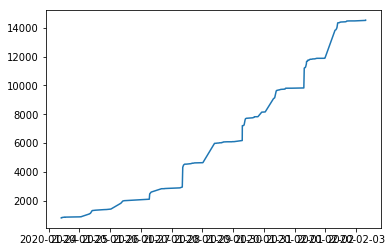

In [7]:
plt.plot(china)

In [14]:
traindata = china[:int(len(china)*0.6)]
testdata = china[int(len(china)*0.6):]

## 此处决定使用处理后的数据格式1  进行训练与预测

In [131]:
total['confirm']

date_time
2020-01-24      837.166667
2020-01-25     1200.000000
2020-01-26     1864.500000
2020-01-27     2662.166667
2020-01-28     4302.650000
2020-01-29     5966.148148
2020-01-30     7502.444444
2020-01-31     9429.178571
2020-02-01    11660.564103
2020-02-02    14313.903226
2020-02-03    14530.500000
Name: confirm, dtype: float64

### 开始训练LSTM

In [148]:

'''
下面的split_sequence（）函数实现了这种行为，并将给定的单变量序列分成多个样本，其中每个样本具有指定的时间步长，输出是单个时间步。
'''
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
 
if __name__ == '__main__':
 
    # define input sequence
    raw_seq = total['confirm'].values
    print(raw_seq)
    # choose a number of time steps
    n_steps = 3
    # split into samples
   # raw_seq,train_low,train_high = Normalize(raw_seq)
    
    X, y = split_sequence(raw_seq, n_steps)
    print(X, y)
    # reshape from [samples, timesteps] into [samples, timesteps, features]
    n_features = 1
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    # define model
    model = Sequential()
    model.add(LSTM(25, activation='relu', input_shape=(n_steps, n_features)))  # 隐藏层，输入，特征维
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    # fit model
    model.fit(X, y, epochs=500, batch_size=1, verbose=2)  # 迭代次数，批次数，verbose决定是否显示每次迭代
    # demonstrate prediction
    x_input = array(total['confirm'].values[-3:])
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    print(x_input, yhat)
    print(yhat)


[  837.16666667  1200.          1864.5         2662.16666667
  4302.65        5966.14814815  7502.44444444  9429.17857143
 11660.56410256 14313.90322581 14530.5       ]
[[  837.16666667  1200.          1864.5       ]
 [ 1200.          1864.5         2662.16666667]
 [ 1864.5         2662.16666667  4302.65      ]
 [ 2662.16666667  4302.65        5966.14814815]
 [ 4302.65        5966.14814815  7502.44444444]
 [ 5966.14814815  7502.44444444  9429.17857143]
 [ 7502.44444444  9429.17857143 11660.56410256]
 [ 9429.17857143 11660.56410256 14313.90322581]] [ 2662.16666667  4302.65        5966.14814815  7502.44444444
  9429.17857143 11660.56410256 14313.90322581 14530.5       ]
Epoch 1/500
 - 1s - loss: 83654768.6250
Epoch 2/500
 - 0s - loss: 80308762.5000
Epoch 3/500
 - 0s - loss: 77983401.3750
Epoch 4/500
 - 0s - loss: 75256086.1875
Epoch 5/500
 - 0s - loss: 71006194.3125
Epoch 6/500
 - 0s - loss: 68431190.8125
Epoch 7/500
 - 0s - loss: 65396117.2500
Epoch 8/500
 - 0s - loss: 62712402.9375
Epo

 - 0s - loss: 2297060.1367
Epoch 187/500
 - 0s - loss: 2306732.7500
Epoch 188/500
 - 0s - loss: 2326778.5742
Epoch 189/500
 - 0s - loss: 2287133.9531
Epoch 190/500
 - 0s - loss: 2287171.0586
Epoch 191/500
 - 0s - loss: 2287407.7656
Epoch 192/500
 - 0s - loss: 2283745.8164
Epoch 193/500
 - 0s - loss: 2286149.3789
Epoch 194/500
 - 0s - loss: 2279176.4219
Epoch 195/500
 - 0s - loss: 2284952.8984
Epoch 196/500
 - 0s - loss: 2283590.4023
Epoch 197/500
 - 0s - loss: 2307613.9336
Epoch 198/500
 - 0s - loss: 2280222.7637
Epoch 199/500
 - 0s - loss: 2306876.6797
Epoch 200/500
 - 0s - loss: 2305782.9102
Epoch 201/500
 - 0s - loss: 2279753.9766
Epoch 202/500
 - 0s - loss: 2280837.4922
Epoch 203/500
 - 0s - loss: 2283143.1797
Epoch 204/500
 - 0s - loss: 2278544.6523
Epoch 205/500
 - 0s - loss: 2296659.3359
Epoch 206/500
 - 0s - loss: 2289921.0117
Epoch 207/500
 - 0s - loss: 2306508.6797
Epoch 208/500
 - 0s - loss: 2278524.1797
Epoch 209/500
 - 0s - loss: 2287475.5508
Epoch 210/500
 - 0s - loss: 23

 - 0s - loss: 2234422.2949
Epoch 387/500
 - 0s - loss: 2211553.0137
Epoch 388/500
 - 0s - loss: 2208014.3398
Epoch 389/500
 - 0s - loss: 2210874.7031
Epoch 390/500
 - 0s - loss: 2237834.4258
Epoch 391/500
 - 0s - loss: 2248354.6250
Epoch 392/500
 - 0s - loss: 2221688.5664
Epoch 393/500
 - 0s - loss: 2246939.3867
Epoch 394/500
 - 0s - loss: 2213131.3008
Epoch 395/500
 - 0s - loss: 2249538.5352
Epoch 396/500
 - 0s - loss: 2239213.7969
Epoch 397/500
 - 0s - loss: 2218260.8809
Epoch 398/500
 - 0s - loss: 2201849.9551
Epoch 399/500
 - 0s - loss: 2212791.7773
Epoch 400/500
 - 0s - loss: 2216415.1836
Epoch 401/500
 - 0s - loss: 2218115.0391
Epoch 402/500
 - 0s - loss: 2243016.9727
Epoch 403/500
 - 0s - loss: 2235538.6836
Epoch 404/500
 - 0s - loss: 2205111.8164
Epoch 405/500
 - 0s - loss: 2202359.3594
Epoch 406/500
 - 0s - loss: 2210625.9805
Epoch 407/500
 - 0s - loss: 2202412.1953
Epoch 408/500
 - 0s - loss: 2201040.4141
Epoch 409/500
 - 0s - loss: 2233065.9414
Epoch 410/500
 - 0s - loss: 22

In [166]:
x_input = array(total['confirm'].values[-3:])
x_input = x_input.reshape((1, n_steps, n_features))

print(x_input)
    
for i in range(10):
    yhat = model.predict(x_input[-3:].reshape((1, n_steps, n_features)), verbose=0)
    x_input=np.append(x_input,yhat)
    print(yhat)
print(x_input)

[[[11660.56410256]
  [14313.90322581]
  [14530.5       ]]]
[[19999.842]]
[[23785.512]]
[[28102.07]]
[[35069.69]]
[[42213.65]]
[[51113.055]]
[[62418.54]]
[[75612.03]]
[[91834.484]]
[[111648.766]]
[ 11660.56410256  14313.90322581  14530.5         19999.84179688
  23785.51171875  28102.0703125   35069.69140625  42213.6484375
  51113.0546875   62418.5390625   75612.03125     91834.484375
 111648.765625  ]


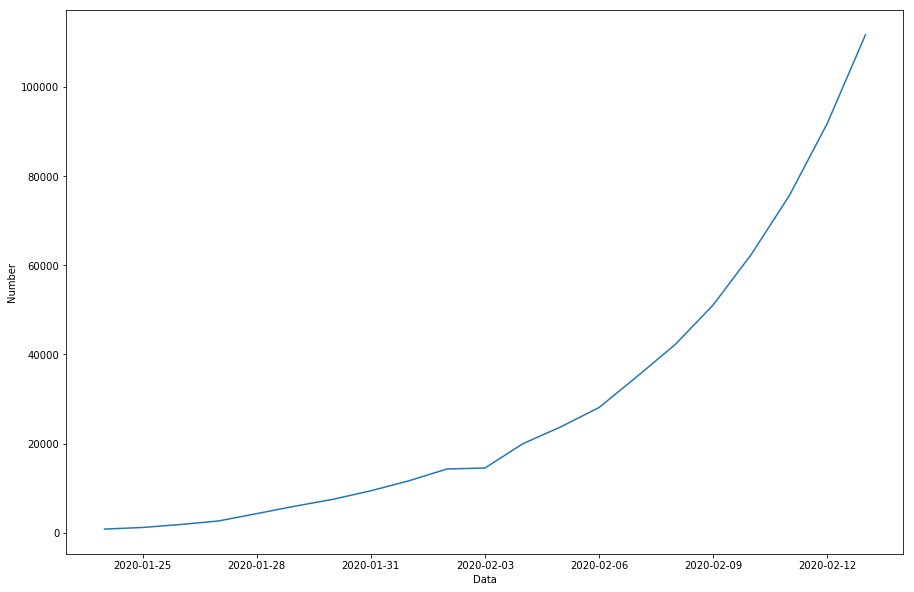

In [171]:
all_predict = total.confirm.append(pd.Series(x_input[3:],index=pd.date_range(start='2020-02-04', end='2020-02-13')))
plt.figure(figsize=(15,10))
plt.plot(all_predict)
plt.xlabel('Data')
plt.ylabel('Number')

In [165]:
all_predict

2020-01-24       837.166667
2020-01-25      1200.000000
2020-01-26      1864.500000
2020-01-27      2662.166667
2020-01-28      4302.650000
2020-01-29      5966.148148
2020-01-30      7502.444444
2020-01-31      9429.178571
2020-02-01     11660.564103
2020-02-02     14313.903226
2020-02-03     14530.500000
2020-02-04     19999.841797
2020-02-05     23785.511719
2020-02-06     28102.070312
2020-02-07     35069.691406
2020-02-08     42213.648438
2020-02-09     51113.054688
2020-02-10     62418.539062
2020-02-11     75612.031250
2020-02-12     91834.484375
2020-02-13    111648.765625
dtype: float64

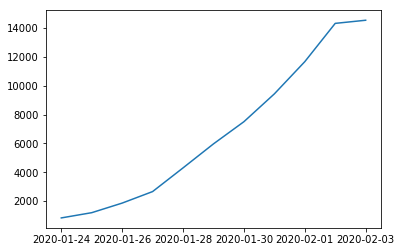

In [130]:
plt.plot(total['confirm'])